Sales Analysis






In [7]:
import pandas as pd
import numpy as np
import os

In [19]:
# Specify the directory containing the CSV files
folder_path = 'C:/Users/HP/Python-for-Data-Science/Sales_data_analysis/Pandas-Data-Science-Tasks/SalesAnalysis/Sales_Data'
# Get a list of all files in the directory
# The os.listdir go through all the items of a folder and then we are checking if the files are csv then 
# get the names and put into a list
csv_files = [file for file in os.listdir(folder_path) if file.endswith('.csv')]

In [22]:
# made an empty dataframe 
all_months_data = pd.DataFrame()
# concatenating all the names of files with the path and then concatenating the dataframes into
# single dataframe 
for file in csv_files:
    df = pd.read_csv('C:/Users/HP/Python-for-Data-Science/Sales_data_analysis/Pandas-Data-Science-Tasks/SalesAnalysis/Sales_Data/'+ file)
    all_months_data = pd.concat([all_months_data, df])
# Making a csv file of from the concatenated data frame 
all_months_data.to_csv('all_data.csv', index = False)

Reading the concatenated csv and dropping the rows with NaN order ID

In [27]:
# Reading the concatenated csv
all_data = pd.read_csv('all_data.csv')
all_data.dropna(subset= ['Order ID'], inplace = True)

In [213]:
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order Month,Sales,City,Minutes,Hours,Customer Street
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,46,8,917 1st St
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston,30,22,682 Chestnut St
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,38,14,669 Spruce St
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,38,14,669 Spruce St
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles,27,9,333 8th St
...,...,...,...,...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",9,8.97,Los Angeles,56,20,840 Highland St
186846,259354,iPhone,1,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00,San Francisco,0,16,216 Dogwood St
186847,259355,iPhone,1,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",9,700.00,San Francisco,39,7,220 12th St
186848,259356,34in Ultrawide Monitor,1,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",9,379.99,San Francisco,30,17,511 Forest St


In [32]:
# As we have concatenated some dataframes then there are rows with unusual data which we have to drop
rows_to_drop = all_data[all_data['Order Date'] == 'Order Date'].index
all_data.drop(rows_to_drop, inplace = True)

Augment data with additional columns 

In [37]:
# Convert into date time format and make a separate column for the months 
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'], format = '%m/%d/%y %H:%M')
all_data['Order Month'] = all_data['Order Date'].dt.month

In [39]:
all_data.isna().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
Order Month         0
dtype: int64

Convert columns to correct type 

In [46]:
# Lets first check what the types are actually
all_data.dtypes # It seems that Quantity and price are both in object format instead of numerics 
all_data['Quantity Ordered'] = all_data['Quantity Ordered'].astype(int)
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])

In [47]:
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order Month
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4
...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",9
186846,259354,iPhone,1,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",9
186847,259355,iPhone,1,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",9
186848,259356,34in Ultrawide Monitor,1,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",9


Augmenting another column

In [48]:
all_data['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']

In [215]:
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Order Month,Sales,City,Minutes,Hours,Customer Street
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,46,8,917 1st St
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston,30,22,682 Chestnut St
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,38,14,669 Spruce St
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,38,14,669 Spruce St
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles,27,9,333 8th St
...,...,...,...,...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",9,8.97,Los Angeles,56,20,840 Highland St
186846,259354,iPhone,1,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00,San Francisco,0,16,216 Dogwood St
186847,259355,iPhone,1,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",9,700.00,San Francisco,39,7,220 12th St
186848,259356,34in Ultrawide Monitor,1,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",9,379.99,San Francisco,30,17,511 Forest St


Question 1: What was the best month for sales and how much was earned 

In [58]:
# Order by the months and sum all the sales data 
monthly_sales = all_data.groupby('Order Month')['Sales'].sum()
best_month = monthly_sales.idxmax()
max_sales = monthly_sales.max()

print(f"The best month for sales was Month {best_month} with a total sales amount of ${max_sales:.2f}")

The best month for sales was Month 12 with a total sales amount of $4613443.34


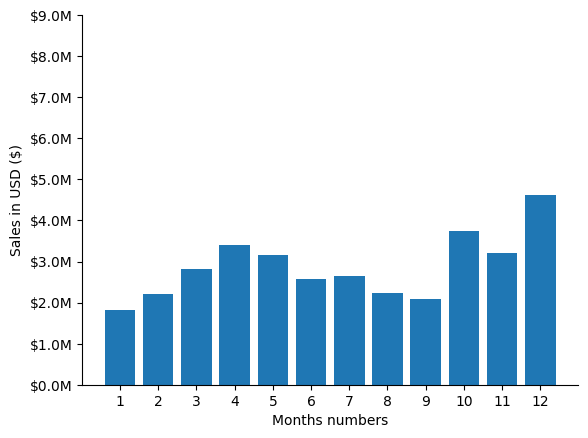

In [188]:
import matplotlib.pyplot as plt

plt.bar(x = monthly_sales.index, height = monthly_sales)
plt.xlabel('Months numbers')
plt.xticks(monthly_sales.index)
plt.ylabel('Sales in USD ($)')
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['top'].set_visible(False)

plt.yticks(range(0, int(city_sales.max()) + 1000000, 1000000), 
           ['${:.1f}M'.format(x / 1000000) for x in range(0, int(city_sales.max()) + 1000000, 1000000)]);

Multivariate Relation : Correlation of Quantity, Price, and sales

In [72]:
# Calculate the correlation matrix
correlation = all_data[['Quantity Ordered', 'Price Each', 'Sales']].corr()

print(correlation)

                  Quantity Ordered  Price Each     Sales
Quantity Ordered          1.000000   -0.148272 -0.139417
Price Each               -0.148272    1.000000  0.999203
Sales                    -0.139417    0.999203  1.000000


Measures of central tendency

In [85]:
from scipy import stats
mean = all_data['Sales'].mean()
median = np.median(all_data['Sales'])
mode = stats.mode(all_data['Sales'])

print("The mean of sales is {0}".format(mean))
print("The median of sales is {0}".format(median))
print("The mode of sales is {0}".format(mode))

sd = np.std(all_data['Sales'])
cv = (sd / mean) 
print("The coefficient of variablity of sales is {0}".format(cv))

The mean of sales is 185.490916751815
The median of sales is 14.95
The mode of sales is ModeResult(mode=14.95, count=20210)
The coefficient of variablity of sales is 1.7947988075580796


Question 2: Which city has the hightest number of sales 

In [121]:
all_data['City'] = all_data['Purchase Address'].str.split(',').str[1].str.strip()
city_sales = all_data.groupby('City')['Sales'].sum()

high_saling_city = city_sales.idxmax()
print("The city with highest sales is {0}".format(high_saling_city))
city_sales

The city with highest sales is San Francisco


City
Atlanta          2795498.58
Austin           1819581.75
Boston           3661642.01
Dallas           2767975.40
Los Angeles      5452570.80
New York City    4664317.43
Portland         2320490.61
San Francisco    8262203.91
Seattle          2747755.48
Name: Sales, dtype: float64

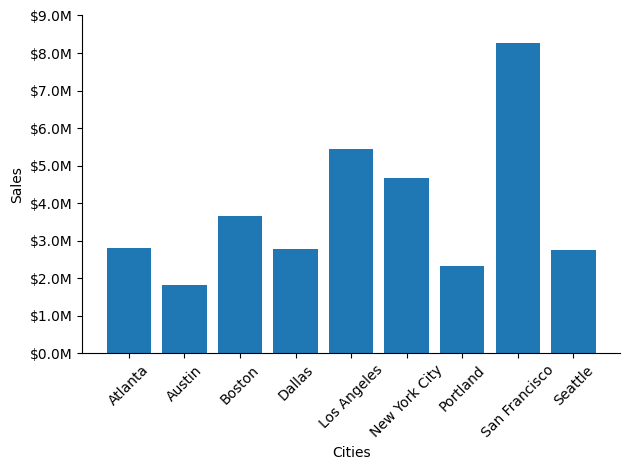

In [122]:
plt.figure()
plt.bar(x = city_sales.index, height = city_sales.values)
plt.xticks(rotation = 45)
plt.xlabel('Cities')
plt.ylabel('Sales')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.yticks(range(0, int(city_sales.max()) + 1000000, 1000000), 
           ['${:.1f}M'.format(x / 1000000) for x in range(0, int(city_sales.max()) + 1000000, 1000000)])

plt.tight_layout()
plt.show()

Question 3: What time should we display advertisment to maximize the likelihood of customer's buying product?

In [132]:
all_data['Minutes'] = all_data['Order Date'].dt.minute
all_data['Hours'] = all_data['Order Date'].dt.hour

In [195]:
time_combined = all_data.groupby('Hours')['Sales'].sum()
# The hour with highest sales recorded is 
high_time = time_combined.idxmax()

print('The hour with highest sales record is {0}th hour or {1} PM'.format(high_time, 24-(high_time-1)))

The hour with highest sales record is 19th hour or 6 PM


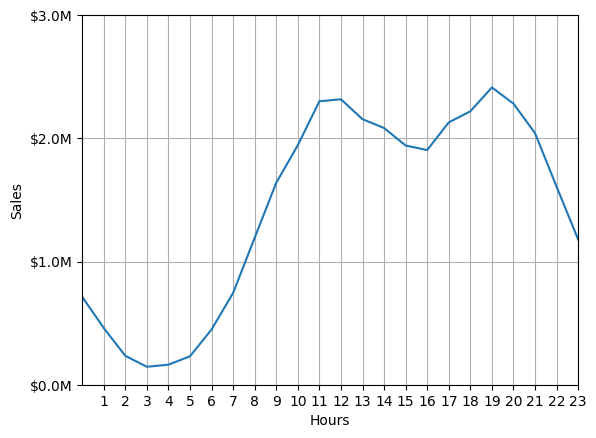

In [194]:
plt.plot(time_combined.index, time_combined.values);
hours = np.arange(1, 24, 1)

plt.xlabel('Hours')
plt.ylabel('Sales')
plt.grid(True)
plt.yticks(np.arange(0, max(time_combined) + 1000000, 1000000), 
           ['${:.1f}M'.format(x / 1000000) for x in np.arange(0, max(time_combined) + 1000000, 1000000)])
plt.ylim(bottom=0)
plt.xlim(0, 23)
plt.xticks(hours);

Question 4: What products are often sold together?

In [201]:
all_data.drop('Order Time', axis=1, inplace=True)

In [225]:
# We have grouped the products according to the purchase address , date , hour and minutes to get products 
# ordered together
data = all_data.groupby(['Purchase Address', all_data['Order Date'].dt.date, 'Hours', 'Minutes']).agg({
    "Product":','.join
}).reset_index()
# Here we have filtered out the products more than 2 ordered together
data['Product_number'] = data['Product'].str.split(',')
data = data[data['Product_number'].apply(len)>=2]
data.drop('Product_number', axis = 1, inplace = True)

In [231]:
from itertools import combinations
from collections import Counter

# Create a dictionary to store combinations and their frequencies
product_combinations = Counter()

for index, row in data.iterrows():
    products = row['Product'].split(',')
    if len(products) >= 2:  # Only consider orders with 2 or more products
        # Generate all possible combinations of 2 products in the order
        product_pairs = combinations(products, 2)
        # Update the frequency count for each combination
        product_combinations.update(product_pairs)
most_common_combinations = product_combinations.most_common()

for combination, frequency in most_common_combinations:
    print(f"Products: {combination}, Frequency: {frequency}")

Products: ('iPhone', 'Lightning Charging Cable'), Frequency: 1005
Products: ('Google Phone', 'USB-C Charging Cable'), Frequency: 987
Products: ('iPhone', 'Wired Headphones'), Frequency: 447
Products: ('Google Phone', 'Wired Headphones'), Frequency: 414
Products: ('Vareebadd Phone', 'USB-C Charging Cable'), Frequency: 361
Products: ('iPhone', 'Apple Airpods Headphones'), Frequency: 360
Products: ('Google Phone', 'Bose SoundSport Headphones'), Frequency: 220
Products: ('USB-C Charging Cable', 'Wired Headphones'), Frequency: 160
Products: ('Vareebadd Phone', 'Wired Headphones'), Frequency: 143
Products: ('Lightning Charging Cable', 'Wired Headphones'), Frequency: 92
Products: ('Lightning Charging Cable', 'Apple Airpods Headphones'), Frequency: 81
Products: ('Vareebadd Phone', 'Bose SoundSport Headphones'), Frequency: 80
Products: ('USB-C Charging Cable', 'Bose SoundSport Headphones'), Frequency: 77
Products: ('Apple Airpods Headphones', 'Wired Headphones'), Frequency: 69
Products: ('Light

Question 5: What product sold the most and why sold the most?

In [233]:
all_data.drop('Customer Street', axis = 1, inplace = True)

In [237]:
data_product = all_data.groupby('Product')['Quantity Ordered'].sum()
product = data_product.idxmax()
quantity = data_product.max()

print('The most ordered product is {0} and the quantity sold is {1}'.format(product, quantity))

The most ordered product is AAA Batteries (4-pack) and the quantity sold is 31017


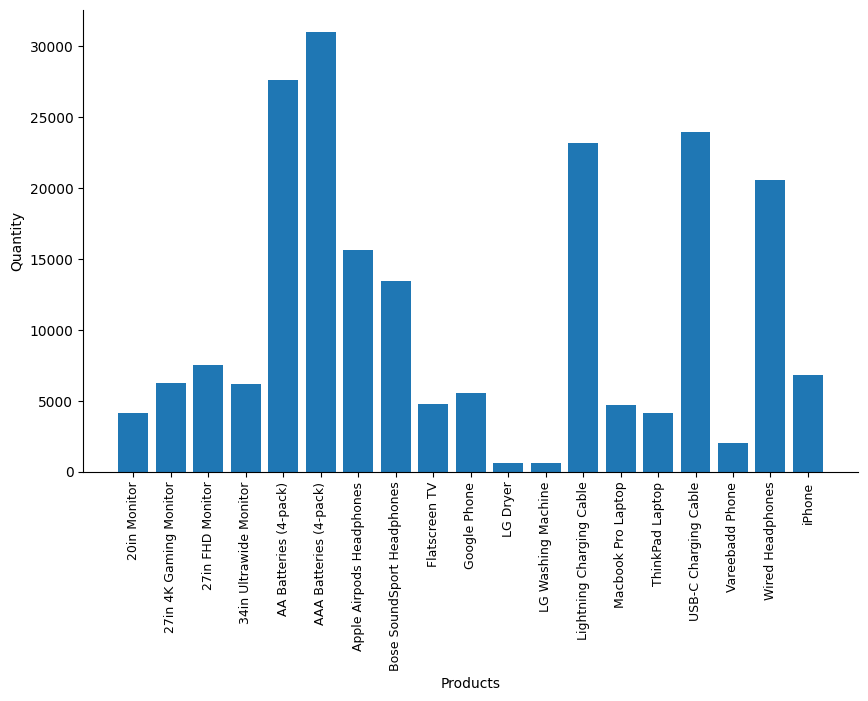

In [248]:
plt.figure(figsize = (10, 6))
plt.bar(data_product.index, data_product.values);
plt.xticks(rotation=90, size = 9);
plt.xlabel('Products')
plt.ylabel('Quantity')
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

To answer the why part we need to compare the prices 

C:\Users\HP\AppData\Local\Temp\ipykernel_6440\3601856569.py:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(data_product.index, rotation=90, size = 10)


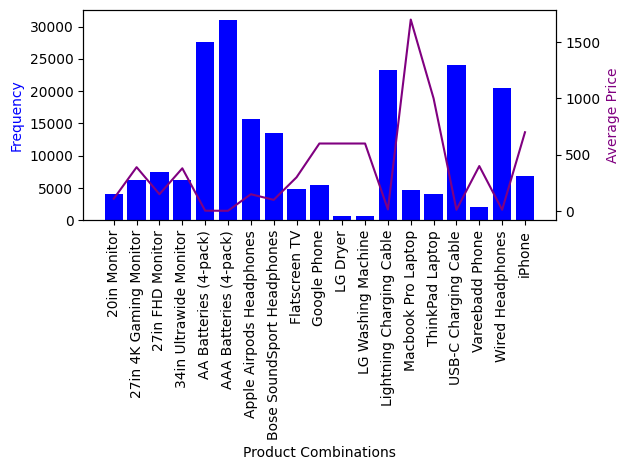

In [268]:
prices = all_data.groupby('Product')['Price Each'].mean()
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()

ax1.bar(data_product.index, data_product.values, color='b')  # Set color to green
ax2.plot(data_product.index, prices, color='purple')  # Set color to blue

ax1.set_xlabel('Product Combinations')
ax1.set_ylabel('Frequency', color='b')
ax2.set_ylabel('Average Price', color='purple')

ax1.tick_params(axis='y')
ax2.tick_params(axis='y')
ax1.set_xticklabels(data_product.index, rotation=90, size = 10)

plt.tight_layout()
plt.show()